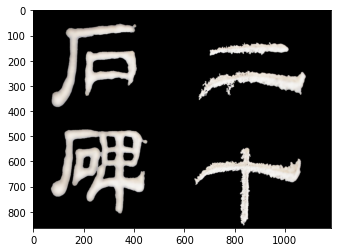

In [1]:
import os
os.chdir('../')
# 导入 opencv-python
import cv2

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    """opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来"""
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    """输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来"""
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    
show_img_from_path('../../data/icdar2017/imgs/a2.jpg')

In [2]:
from mmcv import Config
from mmdet.apis import set_random_seed

cfg = Config.fromfile('./configs/textdet/maskrcnn/mask_rcnn_r50_fpn_160e_icdar2015-test.py')

# 存放输出结果和日志的目录
cfg.work_dir = './demo/det'

# 初始学习率 0.001 是针对 8 个 GPU 训练的
# 如果只有一个 GPU，则除以8
cfg.optimizer.lr = 0.001 / 8
cfg.lr_config.warmup = None

# 每训练40张图像，记录一次日志
cfg.log_config.interval = 40

# 设置随机数种子
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

print(cfg.pretty_text)

checkpoint_config = dict(interval=10)
log_config = dict(interval=40, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
model = dict(
    type='OCRMaskRCNN',
    backbone=dict(
        type='mmdet.ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50'),
        norm_eval=True,
        style='pytorch'),
    neck=dict(
        type='mmdet.FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[4],
            ratios=[0.17, 0.44, 1.13, 2.9, 7

In [ ]:
import mmcv
from mmocr.datasets import build_dataset
from mmocr.models import build_detector
from mmocr.apis import train_detector
import os.path as osp

# 建立数据集
datasets = [build_dataset(cfg.data.train)]

# 建立模型
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# 创建新目录，保存训练结果
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


/home/featurize/work/mmocr/mmocr/apis/train.py:86: UserWarning: config is now expected to have a `runner` section, please set `runner` in your config.
  'please set `runner` in your config.', UserWarning)
2022-04-26 03:12:47,564 - mmocr - INFO - Start running, host: featurize@featurize, work_dir: /home/featurize/work/mmocr/demo/det
2022-04-26 03:12:47,566 - mmocr - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHoo

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


2022-04-26 03:13:23,233 - mmocr - INFO - Epoch [1][40/125]	lr: 1.250e-04, eta: 4:55:39, time: 0.889, data_time: 0.123, memory: 5530, loss_rpn_cls: 0.6927, loss_rpn_bbox: 0.0088, loss_cls: 0.3952, acc: 99.3805, loss_bbox: 0.0015, loss_mask: 0.6950, loss: 1.7932
2022-04-26 03:13:56,087 - mmocr - INFO - Epoch [1][80/125]	lr: 1.250e-04, eta: 4:43:52, time: 0.821, data_time: 0.034, memory: 5530, loss_rpn_cls: 0.6088, loss_rpn_bbox: 0.0086, loss_cls: 0.1357, acc: 99.4611, loss_bbox: 0.0058, loss_mask: 0.6789, loss: 1.4377
